<a href="https://colab.research.google.com/github/supriyaohdar/twitter_sentiment_analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #to find/replace particular phrase or words
import string #to get info in the string
import nltk
import warnings 
warnings.filterwarnings('ignore')

In [130]:
#from google.colab import files
#uploaded=files.upload()

#Load the dataset

In [157]:
df=pd.read_csv("Twitter Sentiments.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [133]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

0-postive &
1-negative

#Preprocessing the Data

In [158]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(len(df)):
   #print(i)
    rev = re.sub("[^a-zA-Z]",' ',df['tweet'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = ' '.join(rev)
    corpus.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Exploratory data analysis

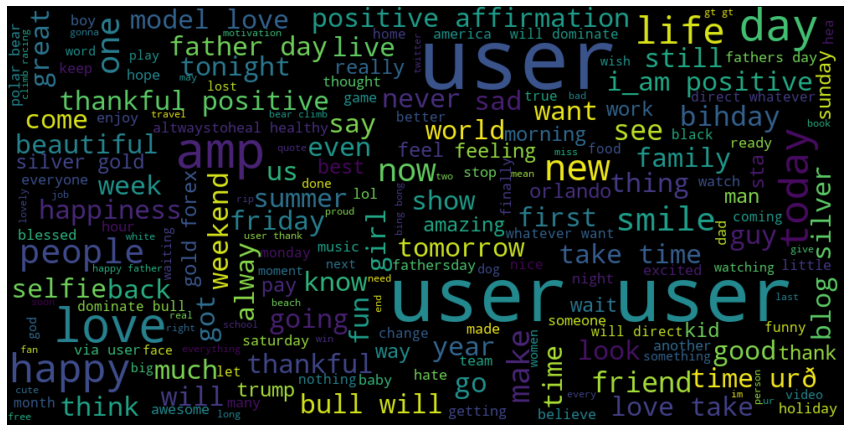

In [135]:
#frequent word visulaizations
from wordcloud import WordCloud

all_words=" ".join([sentence for sentence in df['tweet']])
wordcloud=WordCloud(width=1000,height=500,random_state=1,max_font_size=100).generate(all_words)
#wordcloud = WordCloud().generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Convert a collection of text documents to a matrix of token counts(BOW)

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_features=5000, stop_words='english')
bow=bow_vectorizer.fit_transform(corpus).toarray()
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [137]:
bow.shape

(31962, 5000)

#Splitting the dataset

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow, df['label'], test_size = 0.20, random_state = 0)

#Build the model

Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
pred = model.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

0.9602690442671672


array([[5937,   48],
       [ 206,  202]])

In [142]:
df = pd.DataFrame({'Actual':y_test,'Prediction':pred})
df.head(10)

,Actual,Prediction
13667,0,0
22090,0,0
21397,0,0
26091,0,0
23671,0,0
1687,0,0
26970,0,0
9122,0,0
4127,0,0
3427,0,0


Naive Bayes

In [161]:
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB()

In [162]:
model1.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [164]:
pred1 = model.predict(X_test)

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test,pred1))
confusion_matrix(y_test,pred1)

0.9602690442671672


array([[5937,   48],
       [ 206,  202]])

In [166]:
df = pd.DataFrame({'Actual':y_test,'Prediction':pred1})
df.head(10)

,Actual,Prediction
13667,0,0
22090,0,0
21397,0,0
26091,0,0
23671,0,0
1687,0,0
26970,0,0
9122,0,0
4127,0,0
3427,0,0


#Test the model

In [167]:
import pickle
pickle.dump(model,open('Model_1.pkl','wb'))
Model_1=pickle.load(open('Model_1.pkl','rb'))

In [168]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def test_model(test_sentence):   # 0=spam , 1=ham
    rev = re.sub('[^a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    
    rev = bow_vectorizer.transform([rev]).toarray()
    
    output = model1.predict(rev)[0]
    
    if output == 0:
        print("Positive Analysis")
    else:
        print("Negative Analysis")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
test_model("I am happy for you")

Positive Analysis


In [176]:
test_model("user see Golden temple with condemn act")

Negative Analysis


In [152]:

'''
other method for preprocessing

#for removing different pattern 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt



#remove twitter handles
#df['new_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

#remove special character,numbers and punctuations]
#df['new_tweet']=df['new_tweet'].str.replace("[^a-zA-Z#]"," ")

#remove short words and punctuations
df['new_tweet']=df['new_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(10)



#tokenized_tweet=df['new_tweet'].apply(lambda x:x.split())
#tokenized_tweet.head()

#stemming
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['new_tweet'] = tokenized_tweet
df.head()
'''


'\n#for removing different pattern \ndef remove_pattern(input_txt, pattern):\n    r = re.findall(pattern, input_txt)\n    for word in r:\n        input_txt = re.sub(word, "", input_txt)\n    return input_txt\n\n\n\n#remove twitter handles\n#df[\'new_tweet\']=np.vectorize(remove_pattern)(df[\'tweet\'],"@[\\w]*")\n\n#remove special character,numbers and punctuations]\n#df[\'new_tweet\']=df[\'new_tweet\'].str.replace("[^a-zA-Z#]"," ")\n\n#remove short words and punctuations\ndf[\'new_tweet\']=df[\'new_tweet\'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))\ndf.head(10)\n\n\n\n#tokenized_tweet=df[\'new_tweet\'].apply(lambda x:x.split())\n#tokenized_tweet.head()\n\n#stemming\nfrom nltk.stem.porter import PorterStemmer\nstemmer=PorterStemmer()\n\ntokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])\ntokenized_tweet.head()\n\n# combine words into single sentence\nfor i in range(len(tokenized_tweet)):\n    tokenized_tweet[i] = " ".j